### NLP WORD2VEC

El archivo Software.json lo podemos encontrar en el siguiente enlace,

https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

*Gina Martinez López*

Importamos algunas librerías que usaremos para tokenización del texto.

In [1]:
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
print("The punkt tokenizer is downloaded")

The punkt tokenizer is downloaded


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Los datos están adjuntos en el drive

In [2]:
#para acceder a los datos del drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para cargar los datos

In [4]:
#para importar la librería pandas.
import pandas as pd

Revisemos los datos como un data.frame

In [5]:
software = pd.read_json("/content/drive/MyDrive/Software.json", lines=True)
print("Listo, datos cargados")

Listo, datos cargados


In [6]:
software.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,4,True,"03 11, 2014",A240ORQ2LF9LUI,0077613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,4,True,"02 23, 2014",A1YCCU0YRLS0FE,0077613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,1,True,"02 17, 2014",A1BJHRQDYVAY2J,0077613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7,NaN
3,3,True,"02 17, 2014",APRDVZ6QBIQXT,0077613252,{'Format:': ' Loose Leaf'},Lucy,This book was missing pages!!! Important pages...,missing pages!!,1392595200,3,NaN
4,5,False,"10 14, 2013",A2JZTTBSLS1QXV,0077775473,NaN,Albert V.,I have used LearnSmart and can officially say ...,Best study product out there!,1381708800,NaN,NaN


Tamaño de los datos

In [7]:
software.shape

(459436, 12)

In [8]:
# Ver información de los datos
software.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459436 entries, 0 to 459435
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall         459436 non-null  int64 
 1   verified        459436 non-null  bool  
 2   reviewTime      459436 non-null  object
 3   reviewerID      459436 non-null  object
 4   asin            459436 non-null  object
 5   style           234401 non-null  object
 6   reviewerName    459412 non-null  object
 7   reviewText      459370 non-null  object
 8   summary         459380 non-null  object
 9   unixReviewTime  459436 non-null  int64 
 10  vote            127853 non-null  object
 11  image           1508 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 39.0+ MB


In [9]:
# Vamos a eliminar los datos faltantes de la variable de interés.
software.reviewText.dropna()

0         The materials arrived early and were in excell...
1         I am really enjoying this book with the worksh...
2         IF YOU ARE TAKING THIS CLASS DON"T WASTE YOUR ...
3         This book was missing pages!!! Important pages...
4         I have used LearnSmart and can officially say ...
                                ...                        
459431    No instructions.....No Help unless you want to...
459432                                          it's a joke
459433    I have multiple licenses of the Antivirus. I h...
459434                                           good value
459435                       very nice designs easy to use.
Name: reviewText, Length: 459370, dtype: object

In [10]:
# Convertir los review en una cadena e imprimimos la longitud
software_corpus = ''.join(software['reviewText'].dropna()+" ")
print("Raw Corpus contains {0:,} carácteres".format(len(software_corpus)))

Raw Corpus contains 197,990,167 carácteres


In [11]:
# Cargar el tokenizados
tokenizer = nltk.data.load("tokenizers/punkt/english.pickle")
print("El punkt tokenizer está cargado")
# Vamos a tokenizar en sentencias.
software_sentences = tokenizer.tokenize(software_corpus)
print("Tenemos {0:,} sentences".format(len(software_sentences)))

El punkt tokenizer está cargado
Tenemos 2,282,875 sentences


In [12]:
import re
# Limpiar y dividie las sentencias en palabras.
def clean_and_split_str(string):
    patron = re.compile("[^A-Za-z]+")
    string = re.sub(patron, " ", string)
    return string.strip().split()

In [13]:
# Limpiar y construir la lista de sentencias 
sentences = []
for software_sent in software_sentences:
    if len(software_sent) > 0:
        sentences.append(clean_and_split_str(software_sent))
print("Tenemos {0:,} sentences limpias".format(len(sentences)))

Tenemos 2,282,875 sentences limpias


In [14]:
#Revisar algunos valores
software_sentences[1:10]
sentences[1:10]

[['However',
  'for',
  'the',
  'money',
  'spent',
  'they',
  'really',
  'should',
  've',
  'come',
  'with',
  'a',
  'binder',
  'and',
  'not',
  'just',
  'loose',
  'leaf'],
 ['I',
  'am',
  'really',
  'enjoying',
  'this',
  'book',
  'with',
  'the',
  'worksheets',
  'that',
  'make',
  'you',
  'review',
  'your',
  'goals',
  'what',
  'to',
  'do',
  'when',
  'you',
  'do',
  'not',
  'make',
  'it',
  'it',
  'reminds',
  'me',
  'of',
  'my',
  'human',
  'sexuality',
  'classwork'],
 ['IF',
  'YOU',
  'ARE',
  'TAKING',
  'THIS',
  'CLASS',
  'DON',
  'T',
  'WASTE',
  'YOUR',
  'MONEY',
  'ON',
  'THIS',
  'SO',
  'CALLED',
  'BOOK'],
 ['FOR',
  'A',
  'BOOK',
  'THAT',
  'ISIN',
  'T',
  'EVEN',
  'BOUND',
  'LOOSE',
  'LEAFS',
  'THAT',
  'I',
  'HAD',
  'TO',
  'PROVIDE',
  'MY',
  'OWN',
  'BINDER',
  'FOR'],
 ['TURNS',
  'OUT',
  'YOU',
  'CAN',
  'BUY',
  'ACCESS',
  'TO',
  'THE',
  'BOOK',
  'AT',
  'MCGRAW',
  'HILL',
  'CONNECT',
  'CORE',
  'FOR',
  'TH

In [15]:
token_count = sum([len(sentence) for sentence in sentences])
print("El corpus contiene {0:,} tokens".format(token_count))

El corpus contiene 36,000,501 tokens


In [16]:
# Importar y generar el modelo
from gensim.models import Word2Vec
word2vec = Word2Vec(sentences, min_count=2)
word2vec.save("software.model.w2v")
print("Modelo guardado")

Modelo guardado


In [17]:
#Guardar el modelo
word2vec.save("software.model.w2v")
print("Modelo guardado")

Modelo guardado


In [18]:
# veamos el tamaño : recordemos que por defector gemsin trabaja con 100.
vocabulary = word2vec
print(vocabulary)

Word2Vec<vocab=83892, vector_size=100, alpha=0.025>


In [19]:
# revisemos la similitud de algunas palabras
sim_words = word2vec.wv.most_similar('computer')
sim_words

[('pc', 0.9040648937225342),
 ('machine', 0.9006593823432922),
 ('laptop', 0.8532182574272156),
 ('PC', 0.8451831340789795),
 ('comp', 0.787407398223877),
 ('computor', 0.7672891020774841),
 ('puter', 0.7505754232406616),
 ('system', 0.7463528513908386),
 ('computers', 0.7099953889846802),
 ('iMac', 0.6568363904953003)]

In [20]:
# otro ejemplo de similitud
sim_words = word2vec.wv.most_similar('online')
sim_words

[('electronic', 0.6057339310646057),
 ('PayPal', 0.6045591831207275),
 ('internet', 0.6032042503356934),
 ('web', 0.5948143005371094),
 ('website', 0.564220130443573),
 ('direct', 0.5625730156898499),
 ('Online', 0.5601915121078491),
 ('MSN', 0.549650251865387),
 ('cloud', 0.5467379689216614),
 ('bank', 0.5454502105712891)]

In [21]:
# podemos imprimir algunas similaridades entre palabras con base al corpus
print(word2vec.wv.similarity("password", "online"))


0.1446361


In [22]:
# recordemos la ecuación fundamental de word2vec
most_similar = word2vec.wv.most_similar(positive=['computer', 'disc'], negative=['men'], topn=5)
for item in most_similar:
    print(item)

('disk', 0.7641372680664062)
('machine', 0.6689821481704712)
('harddrive', 0.6627934575080872)
('laptop', 0.6612635850906372)
('pc', 0.6252443790435791)


## Seleccionar 10.000 reviews, muestra aleatoria, normalizar datos, top 10 y nube de palabras

In [23]:
import random

def select_random_rows(dataframe):
    nrows = dataframe.shape[0]
    if nrows <= 10000:
        return dataframe
    else:
        random_indices = random.sample(range(nrows), 10000)
        return dataframe.iloc[random_indices]

software_random=select_random_rows(software)

In [24]:
software_random.reviewText.dropna()

46518     Does everything I need and more.  I would reco...
162030    Turbo Tax is the easiest software out there to...
20618     For the last several months I have been transc...
19804     The Good- This software completely locks down ...
124168    Norton seems to be de-engineering their produc...
                                ...                        
311804    Great app. Wish you could choose between swipi...
73567     In my years experience as a PC Tech there were...
116523    Don't let you to correct add ,cut or edit on e...
56209     Excellent. Product in good shape . Came in alm...
64892     Roxio Easy DVD Copy 4 works exactly as describ...
Name: reviewText, Length: 10000, dtype: object

In [25]:
# Convertir los review en una cadena e imprimimos la longitud
software_random_corpus = ''.join(software_random['reviewText'].dropna()+" ")
print("Raw Corpus contains {0:,} carácteres".format(len(software_random_corpus)))

Raw Corpus contains 4,254,099 carácteres


In [26]:
# Vamos a tokenizar en sentencias.
software_random_sentences = tokenizer.tokenize(software_random_corpus)
print("Tenemos {0:,} sentences".format(len(software_random_sentences)))

Tenemos 49,081 sentences


In [27]:
import numpy as np 
import pandas as pd
import re
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator


In [28]:
software_random.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
46518,5,True,"07 29, 2013",A320QX83V3UI2M,B000Q6ZK3K,NaN,Anne Gladhill,Does everything I need and more. I would reco...,Great,1375056000,NaN,NaN
162030,5,True,"01 14, 2013",A3QQFRQO49PL2U,B009HBCU9W,{'Format:': ' Software Download'},Scott Spencer,Turbo Tax is the easiest software out there to...,Easy Tax Returns,1358121600,NaN,NaN
20618,4,True,"02 27, 2006",A1PAPE9Y16FKDL,B00030096W,NaN,J. Adamson,For the last several months I have been transc...,Skeptical at first,1140998400,16,NaN
19804,2,False,"02 14, 2006",AT9NR6Q55CAAN,B0002UCSKI,NaN,S. Behrendt,The Good- This software completely locks down ...,"The Good, The Bad, The Ugly",1139875200,6,NaN
124168,1,False,"11 10, 2011",A3FHEVY4ASHTHK,B005GI19HY,{'Platform:': ' PC Disc'},b.a.,Norton seems to be de-engineering their produc...,Worse than 2011,1320883200,9,NaN


In [29]:
software_random.shape

(10000, 12)

In [30]:
!pip install unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
software_random['reviewText'] = software_random['reviewText'].apply(lambda x: x.lower())

<ipython-input-31-701bc2c1478f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  software_random['reviewText'] = software_random['reviewText'].apply(lambda x: x.lower())


In [32]:
from unidecode import unidecode
software_random["reviewText"] = software_random["reviewText"].apply(unidecode)


<ipython-input-32-0ddbcfa3b97e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  software_random["reviewText"] = software_random["reviewText"].apply(unidecode)


In [33]:
software_random['reviewText'] = software_random['reviewText'].str.replace('.', ' ')

<ipython-input-33-7ecc40593398>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  software_random['reviewText'] = software_random['reviewText'].str.replace('.', ' ')
<ipython-input-33-7ecc40593398>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  software_random['reviewText'] = software_random['reviewText'].str.replace('.', ' ')


In [34]:
def quitar_no_alfabeticos(texto):
    return re.sub(r'[^a-zA-Z\s]', '', texto)

software_random['reviewText'] = software_random['reviewText'].apply(quitar_no_alfabeticos)

<ipython-input-34-129b6385c53a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  software_random['reviewText'] = software_random['reviewText'].apply(quitar_no_alfabeticos)


In [35]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def quitar_stop_words(texto):
    tokens = texto.split()
    tokens_filtrados = [palabra for palabra in tokens if palabra not in stop_words]
    return ' '.join(tokens_filtrados)

software_random['reviewText'] = software_random['reviewText'].apply(quitar_stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-35-9234eae3bf1b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  software_random['reviewText'] = software_random['reviewText'].apply(quitar_stop_words)


In [36]:
from nltk.tokenize import word_tokenize
all_words = [word.lower() for text in software_random['reviewText'] for word in word_tokenize(text)]


In [37]:
frecuencias={}
for palabra in all_words:
    if palabra in frecuencias:
        frecuencias[palabra]+=1
    else: 
        frecuencias[palabra]=1
print(frecuencias) 


{'everything': 586, 'need': 1106, 'would': 2227, 'recommend': 659, 'one': 2209, 'uses': 131, 'computer': 1908, 'easy': 1604, 'follow': 151, 'turbo': 350, 'tax': 959, 'easiest': 33, 'software': 3957, 'prepare': 42, 'return': 483, 'downloading': 160, 'directly': 124, 'amazon': 858, 'makes': 379, 'whole': 175, 'process': 319, 'much': 1222, 'easier': 321, 'skip': 24, 'going': 535, 'store': 116, 'paying': 97, 'full': 329, 'retail': 34, 'simply': 202, 'download': 873, 'product': 3201, 'last': 544, 'several': 502, 'months': 259, 'transcribing': 6, 'hundreds': 34, 'pages': 138, 'handwritten': 1, 'journal': 9, 'entries': 49, 'word': 524, 'processor': 77, 'getting': 426, 'really': 1083, 'tired': 31, 'typing': 94, 'decided': 259, 'see': 652, 'dictation': 20, 'make': 927, 'job': 320, 'researched': 11, 'different': 544, 'products': 504, 'available': 368, 'settled': 3, 'upon': 65, 'dragon': 127, 'naturally': 28, 'speaking': 64, 'standard': 139, 'edition': 217, 'initially': 49, 'program': 2879, 'made

**TOP 10**

In [45]:
df = pd.DataFrame([[key, frecuencias[key]] for key in frecuencias.keys()], columns=['Palabra', 'Frecuencia'])
top10=df.sort_values(["Frecuencia"], ascending=False)[:10]
top10

,Palabra,Frecuencia
12,software,3957
264,use,3213
31,product,3201
64,program,2879
402,version,2449
248,get,2281
2,would,2227
4,one,2209
291,windows,2114
551,like,2075


In [38]:
import operator
frecuencias_ordenadas=sorted(frecuencias.items(),key=operator.itemgetter(1),reverse=True)
dictfrecord=dict((key,value) for key,value in frecuencias_ordenadas)

## Nube de Palabras

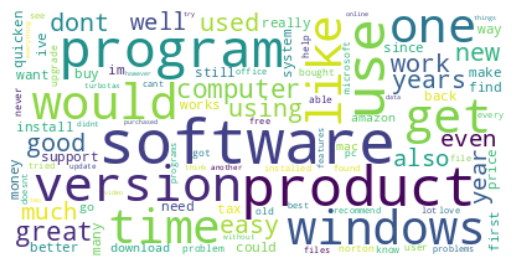

In [49]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(frecuencias)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()